In [1]:
import numpy as np
from genetic_alogorithm_pmf_api import Problem
%config InlineBackend.figure_format = 'svg'

In [2]:
# Set seed for reproducibility
# np.random.seed(42)

# 1. Create problem - Harbor Bridge Design
problem = Problem(
    variables=['x1', 'x2', 'x3', 'x4'],
    bounds=[(10, 70), (10, 400), (2, 10), (350, 750)],
    variable_descriptions={
        'x1': 'Vertical clearance [meters]',
        'x2': 'Distance between pillars [meters]',
        'x3': 'Number of traffic lanes',
        'x4': 'Span of bridge [meters]'
    }
)

# 2. Contractor (O1 - Reduce cost, minimize)
# Preference: -100 + 240/x
# Function range: 0.5186 (best) to 1.7192 (worst)
problem.add_stakeholder(
    name="Contractor",
    weight=0.2,
    objective="(0.4 / x2**0.8) + (0.002 * x1**1.1) + (0.05 * x3**1.2) + (0.0008 * x4**1.05)",
    preference_points=([0.5186, 1.0695, 1.7192], [100, 40, 0]),
    x_label="Cost [billion dollars]"
)

# 3. Port (O2 - Ensure vertical clearance, maximize)
# Preference: 100 / (1 + e^(-0.514 * (x - 45))) - SIGMOID CURVE
# Using 9 points to capture smooth S-shape with inflection point at x1=45
problem.add_stakeholder(
    name="Port",
    weight=0.3,
    objective="x1",
    preference_points=([10, 25, 35, 40, 45, 50, 55, 60, 70], [0, 0, 0.58, 7.11, 50, 92.89, 99.42, 99.96, 100]),
    x_label="Vertical clearance [meters]"
)

# 4. TxDOT (O4 - Maximise traffic capacity, maximize)
# Preference: (100/sqrt(6))*(sqrt(x-2))
# At x=2 (worst): 0
# At x=5 (mid): ~71
# At x=8 (best): 100
problem.add_stakeholder(
    name="TxDOT",
    weight=0.3,
    objective="x3",
    preference_points=([2, 4, 6, 8, 10], [0, 40, 80, 90, 100]),
    x_label="Traffic lanes"
)

# 5. TxCEQ (O5 - Protect environment, minimize)
# Preference: 0.258*sqrt(200000 - x)
# Function range: 53230 (best) to 182019 (worst)
problem.add_stakeholder(
    name="TxCEQ",
    weight=0.1,
    objective="(500000 / x2**1.2) + (5000 * x3**1.1) + (50 * x4**1.15)",
    preference_points=([53230, 101064, 182019], [100, 72.47, 0]),
    x_label="Material CO2 emissions [kg]"
)

# 6. Locals (O6 - Protect people, minimize)
# Preference: 22.36*sqrt(20-x)
# Function range: 0.6633 (best) to 2.4920 (worst)
problem.add_stakeholder(
    name="Locals",
    weight=0.1,
    objective="0.2 * x3**1.1 + 0.0005 * x4**1.05",
    preference_points=([0.6633, 1.5516, 2.4920], [100, 52.04, 0]),
    x_label="Traffic incidents per year"
)

# 7. Add constraint: Horizontal clearance minimum (O3)
problem.add_constraint("x2 >= 35")
problem.add_constraint("x2 <= x4")

The type of aggregation is set to minmax
Generation   Best score   Mean             Max stall    Diversity    Number of non-feasible results
0            10.5707      41000022.647     0            0.004        41          
1            9.3257       12000012.7528    0            0.116        12          
2            9.0696       4000011.4283     0            0.212        4           
3            8.8751       8000010.1399     0            0.22         8           
4            8.871        11000009.8148    0            0.226        11          
5            8.871        8000009.9416     1            0.232        8           
6            8.871        5000009.6623     2            0.23         5           
7            8.871        6000009.5446     3            0.232        6           
8            8.871        4000009.9997     4            0.229        4           
9            8.871        4000009.6926     5            0.232        4           
10           8.871        6000009.5225 

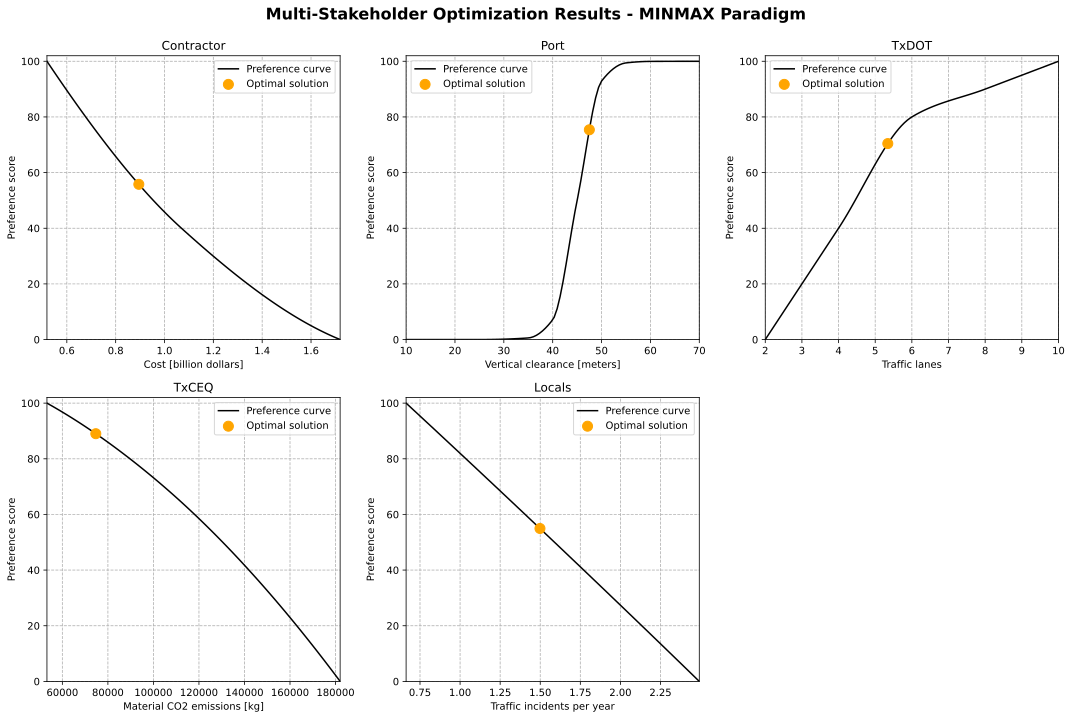


OPTIMIZATION SUMMARY

DESIGN VARIABLES:
   x1 = 47.5000  (Vertical clearance [meters])
   x2 = 182.1484  (Distance between pillars [meters])
   x3 = 5.3438  (Number of traffic lanes)
   x4 = 350.0000  (Span of bridge [meters])

AGGREGATE SCORE: 8.8710

STAKEHOLDERS & OBJECTIVES:
--------------------------------------------------------------------------------

   Contractor:
      Objective function: (0.4 / x2**0.8) + (0.002 * x1**1.1) + (0.05 * x3**1.2) + (0.0008 * x4**1.05)
      Weight: 0.20
      Objective value: 0.8948
      Preference score: 55.79/100

   Port:
      Objective function: x1
      Weight: 0.30
      Objective value: 47.5000
      Preference score: 75.39/100

   TxDOT:
      Objective function: x3
      Weight: 0.30
      Objective value: 5.3438
      Preference score: 70.43/100

   TxCEQ:
      Objective function: (500000 / x2**1.2) + (5000 * x3**1.1) + (50 * x4**1.15)
      Weight: 0.10
      Objective value: 74698.5317
      Preference score: 89.01/100

   Locals

In [3]:
# Set seed immediately before GA run
# np.random.seed(42)

result = problem.solve(paradigm='minmax')
result.plot(paradigm='minmax')
result.print_summary()

The type of aggregation is set to tetra
Generation   Best score   Mean             Max stall    Diversity    Number of non-feasible results
No initial starting point for the optimization with tetra is given. A random population is generated.
0            -100.0       35999968.36      1            0.004        36          
1            -100.0       8999921.4709     1            0.088        9           
2            -100.0       4999914.7394     1            0.124        5           
3            -100.0       15999911.7981    2            0.216        16          
4            -100.0       3999905.7538     3            0.211        4           
5            -100.0       3999905.4758     1            0.228        4           
6            -100.0       3999905.3948     2            0.232        4           
7            -100.0       3999904.8189     3            0.232        4           
8            -100.0       6999905.8637     4            0.23         7           
9            -100.0 

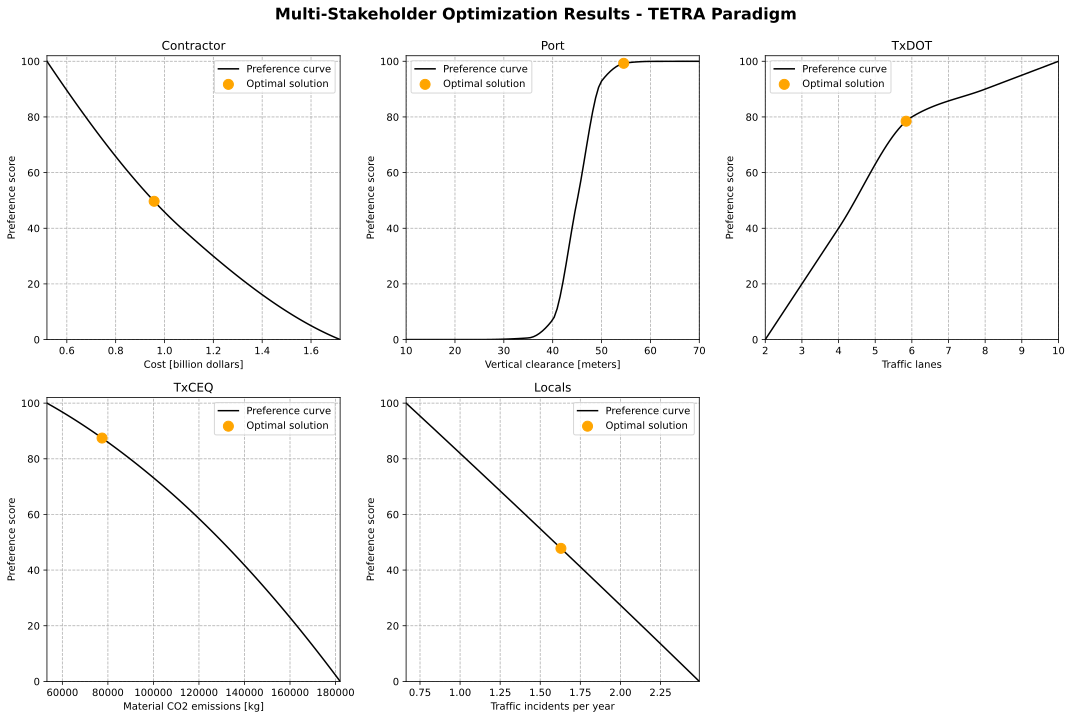


OPTIMIZATION SUMMARY

DESIGN VARIABLES:
   x1 = 54.5312  (Vertical clearance [meters])
   x2 = 349.7266  (Distance between pillars [meters])
   x3 = 5.8438  (Number of traffic lanes)
   x4 = 350.0000  (Span of bridge [meters])

AGGREGATE SCORE: -100.0000

STAKEHOLDERS & OBJECTIVES:
--------------------------------------------------------------------------------

   Contractor:
      Objective function: (0.4 / x2**0.8) + (0.002 * x1**1.1) + (0.05 * x3**1.2) + (0.0008 * x4**1.05)
      Weight: 0.20
      Objective value: 0.9576
      Preference score: 49.69/100

   Port:
      Objective function: x1
      Weight: 0.30
      Objective value: 54.5312
      Preference score: 99.27/100

   TxDOT:
      Objective function: x3
      Weight: 0.30
      Objective value: 5.8438
      Preference score: 78.47/100

   TxCEQ:
      Objective function: (500000 / x2**1.2) + (5000 * x3**1.1) + (50 * x4**1.15)
      Weight: 0.10
      Objective value: 77438.8778
      Preference score: 87.45/100

   Loc

In [4]:
# Set seed immediately before GA run
# np.random.seed(42)

result = problem.solve(paradigm='tetra')
result.plot(paradigm='tetra')
result.print_summary()